# PMR3409 - Controle II
# Lab 1: Amostragem e Reconstrução de Sinais
# V2025

# Identificação

**Aluno 1 : Giovanni Cangiano**           **NUSP:10705892**

**Aluno 2 : Edilson Elias Barbosa Guedes Dias**           **NUSP: 13726042** 

**Turma de Laboratório: 3**

**Professor: Oswaldo Horikawa**

**OBS: Você deve submeter o seu relatório (Somente um por dupla) em um arquivo compactado contendo os seguintes arquivos:**

- **Arquivo Jupyter Notebook *.ipynb com o seu relatório.**
- Diretório contendo todas as figuras do seu relatório (Caso seja necessário!).
- As células contendo código geram gráficos como resposta. Os gráficos devem ser gerados com a opção %matplotlib inline.
- **Manter os gráficos gerados pelas células, i.e., não resetar as células de código.Os resultados contidos nas células são a evidência de como os exercícios foram realizados.**
- Arquivo *.html equivalente ao seu arquivo *.ipynb. Menu: File -> Download as -> HTML. O relatório será corrigido a partir do arquivo *.html o arquivo *.ipynb será verificado caso seja necessário.

## 1. Conversores A/D e D/A

Inicialmente será realizado um experimento para verificação do funcionamento de um sistema de aquisição de dados como ilustrado na figura abaixo. A montagem experimental necessária já deve estar pronta em sua bancada. Caso não esteja comunique ao professor.

**Será utilizado o script Matlab `adda.m`**. O script realiza uma leitura de dado através do canal de entrada A/D de uma tensão analógica proveniente do gerador de funções e transforma esse valor numa representação digital.
Em seguida escreve esse valor no canal de saída D/A. Essas operações são repetidas numa taxa equivalente à frequência
de amostragem $f_s$. No osciloscópio podem ser observados o sinal do gerador de funções e o sinal do canal de saída.

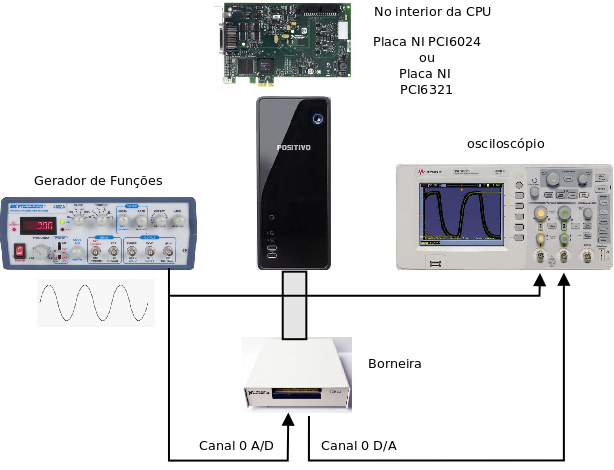

- Selecione no gerador de funções uma onda senoidal de frequência $f=20$Hz e Amplitude 8V pico a pico 
- Abra o arquivo script adda.m dentro do Matlab, escolha uma frequencia de amostragem, por exemplo, $f_s=200$Hz.
- Execute o arquivo **(Clique o botão RUN !)**.

a-) Esboce no espaço abaixo as formas de onda observadas no osciloscópio.

Foram gerados nos osciloscópio as saídas para onda senoidal de frequência $f=20$Hz e Amplitude 8V pico a pico
com diferentes frequências de amostragem, conforme pode ser visto nas figuras abaixo:

frequência de amostragem de 50Hz:

<img src="./freqAq50.jpeg" width="50%" height="50%"/>

frequência de amostragem de 200Hz:

<img src="./freqAq200.jpeg" width="50%" height="50%"/>

frequência de amostragem de 500Hz:

<img src="./freqAq500.jpeg" width="50%" height="50%"/>

frequência de amostragem de 2000Hz:

<img src="./freqAq2000.jpeg" width="50%" height="50%"/>


    
b-) Varie a frequência de amostragem $f_s$. Descreva o efeito observado.

Conforme a frequência de amostragem é aumentada o sinal reconstruído a partir da conversão digital analógica se aproxima melhor da forma
da onda original. Ademais, é válido ressaltar que quanto maior é a frequência de amostragem, menor é o atraso entre o sinal original e o
reconstruído, conforme será discutido na questão abaixo.         

c-) Qual a relação entre a frequência de amostragem $f_s$ e os patamares horizontais observados na forma de onda do canal de saída D/A ?

Quanto maior a frequência de amostragem $f_s$ menores são os patamares horizontais, uma vez que o período entre a amostragem dos pontos digitais é diminuido.

d-) A forma de onda do canal de saída D/A apresenta um atraso em relação à onda de entrada. Apresente uma justificativa.

Na reconstrução da onda na conversão digital analógica, entre os pontos amostrados há um patamar que supõe que a tensão é constante até o próximo ponto amostrado,
assim, caso se reconstrua o sinal com a média desses patamares o sinal será reconstruído com um atraso equivalente a metade do período de amostragem $\frac{T_s}{2}= \frac{2}{f_s}$

## 2. Análise de sinais através da Transformada de Fourier

## 2.1 Representações de sinais periódicos de tempo contínuo em série de Fourier

Inicialmente apresenta-se as expressões analíticas para algumas funções periódicas através de funções senoidais e funções exponenciais complexas.

**a-) Onda senoidal:**
      $$
      x(t) = A\sin(\omega_0 t)
      $$
onde $\omega_0=2\pi \frac{1}{T}$.      
      
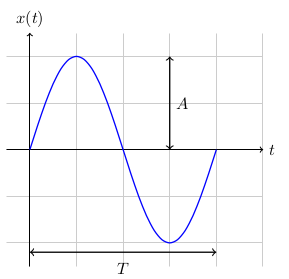

Sabemos que a função seno pode ser escrita como:
\begin{equation}
x{(t)}=A\sin (\omega_0 t) = \sum_{k=-1}^{k=+1} C_k e^{kj\omega_0 t}= \frac{A}{2j}{(e^{j\omega_0 t} -e^{-j\omega_0 t})}
\end{equation}

onde $C_{-1} = \frac{A}{2j}$, $C_0=0.0$ e $C_{+1} = -\frac{A}{2j}$.

Uma representação gráfica é ilustrada na figura abaixo:

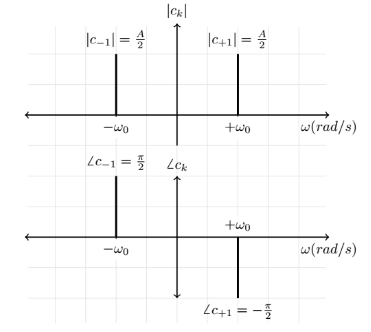

**OBS: Deve ser notado que os coeficientes calculados pelo algoritmo FFT (Fast Fourier Transform) normalizados pelo número de pontos $N$ coincide com os coeficentes da série de Fourier complexa do mesmo sinal.**

**b-) Onda quadrada:**

Uma onda quadrada de amplitude $A$ e período $T$ pode ser descrita no domínio do tempo como:
      
$$
x(t) = \begin{cases} \;\;A  & 0           \leq t < \frac{T}{2} \\
                        -A  & \frac{T}{2} \leq t < T \end{cases}
$$
            
 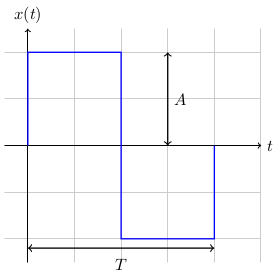

Podemos escrever a série de Fourier da onda Quadrada como:
\begin{equation}
x(t)=\frac{4A}{\pi} \sin \left(\omega_0 t\right)+\frac{4A}{3 \pi} \sin \left(3 \omega_0 t\right)+\frac{4A}{5 \pi} \sin \left(5 \omega_0 t\right)+\ldots 
\end{equation}
E na forma exponencial como:
$$
x(t)=\ldots \frac{2 Aj}{5 \pi} e^{-j 5\omega_0 t}+\frac{2A j}{3 \pi} e^{-j 3\omega_0 t}+\frac{2A j}{\pi} e^{-j\omega_0 t}-\frac{2A j}{\pi} e^{j \omega_0 t}-\frac{2Aj}{3\pi} e^{j 3\omega_0 t}-\frac{2A j}{5 \pi} e^{j 5\omega_0 t}+\ldots
$$

**c-) Onda triangular:**

Uma onda Triangular de amplitude $A$ e período $T$ pode ser descrita no domínio do tempo como:
      $$
      x(t) = \begin{cases} \;\;\frac{4A}{T}t                & 0            \leq t < \frac{1}{4}T \\
                           -\frac{4A}{T}(t-\frac{1}{2}T)    & \frac{T}{4}  \leq t < \frac{3}{4}T \\
                           \;\;\frac{4A}{T}(t-T)            & \frac{3}{4}T \leq t < T \end{cases}
      $$
	
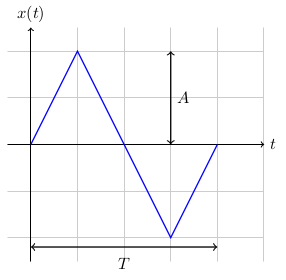

Podemos escrever a série de Fourier da onda Triangular como:
$$
x(t) = \frac{8A}{\pi^2} \sin(\omega_0 t) - \frac{8A}{9\pi^2} \sin(3\omega_0 t) + \frac{8A}{25\pi^2}\sin(5\omega_0 t) \ldots
$$
E na forma exponencial como:
$$
x(t) =   \ldots + \frac{4Aj}{25\pi^2} e^{-j 5\omega_0 t} - \frac{4Aj}{9\pi^2} e^{-j3\omega_0 t} + \frac{4Aj}{\pi^2} e^{-j \omega_0 t} - \frac{4Aj}{\pi^2} e^{j \omega_0 t} +  \frac{4Aj}{9\pi^2} e^{j3\omega_0 t} - \frac{4Aj}{25\pi^2} e^{j 5\omega_0 t} + \ldots
$$

## 2.2 Estimação dos espectros de frequência dos sinais amostrados através do algoritmo FFT

Nessa seção será utilizado o algoritmo denominado Transformada Rápida de Fourier mais conhecido como
algoritmo FFT (Fast Fourier Transform).
O algoritmo FFT é um algoritmo de transformada de Fourier discreta (DFT) que calcula os espectros de
frequência através de amostras do domínio do tempo discreto.

- Vamos utilizar o mesmo setup experimental da seção anterior. Entretanto utilizaremos apenas o canal 0 de entrada A/D.
- Utilizar o script Matlab AquisicaoArquivo.m.
- O script realiza aquisição de amostras do sinal do gerador de funções armazenando os valores das amostras num array, posteriormente salva o array em um arquivo de dados *.txt.
- O script seleciona as amostras de tal forma que o primeiro valor do array (t=0.0) corresponda ao início de uma
  onda, ou seja $\phi=0$.
- **Após a obtenção do arquivo de dados, calcular a FFT utilizando o script da última célula da Seção 2.2.**

### 2.2.1 Onda senoidal

a-) Calcule o espectro de uma onda senoidal utilizando o algoritmo FFT com os seguintes parametros:
    
- No gerador de função selecione a opção onda senoidal de amplitude 2Volts pico a pico e frequência $f=10$Hz
- No script Matlab AquisicaoArqivo.m utilizar uma Taxa de amostragem de 400 amostras/s.
- Para calculo da FFT utilize o script abaixo.

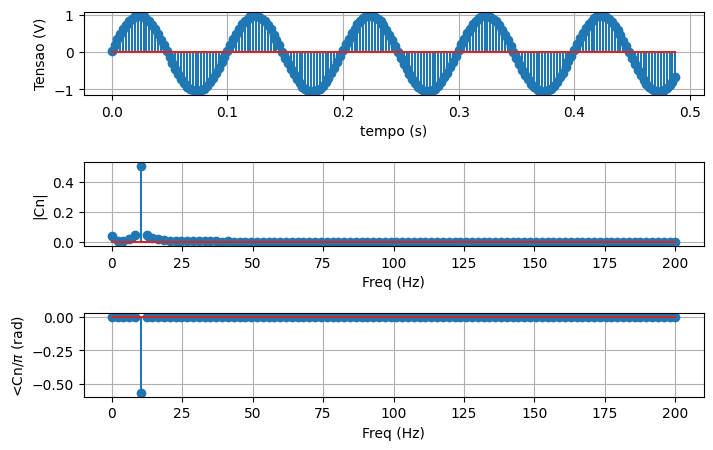

b-) Compare com o resultado analítico da Seção 2.1

**Resposta:** O resultado experimental está próximo ao resultado teórico, com uma magnitude de 0.5 amplitude na frequência do sinal e com um atraso de fase.

### 2.2.2 Onda Quadrada

a-) Calcule o espectro de uma onda quadrada utilizando o algoritmo FFT com os seguintes parametros:
    
- No gerador de função selecione a opção onda quadrada de amplitude 2Volts pico a pico e frequência $f=10$Hz
- No script Matlab AquisicaoArqivo.m utilizar uma Taxa de amostragem de 400 amostras/s.
- Para calculo da FFT utilize o script abaixo.

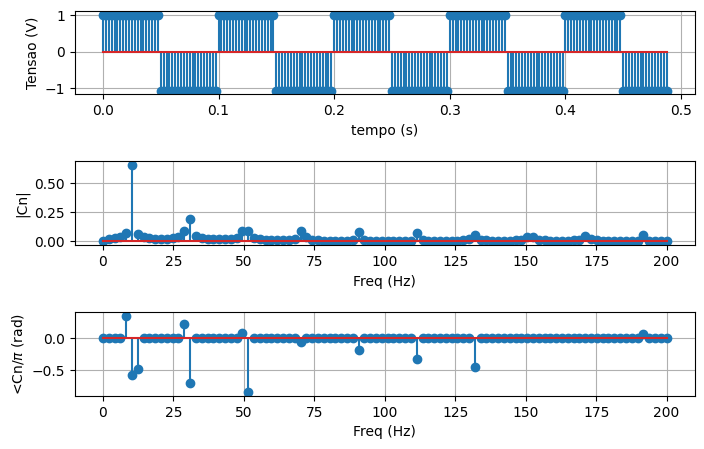

b-) Compare com o resultado analítico da Seção 2.1

**Resposta:** É possível observar que está de acordo com o resultado analítico, em que a magnitude segue uma queda hiperbólica em função dos números ímpares e suas respectivas fases. No entanto, dado a erros numéricos há alguns componentes com fases consideráveis não teóricas mostrados no gráfico, porém é percebido que a magnitude desses componentes de fase não é relevante para a reconstrução do sinal.

### 2.2.3 Onda Triangular

a-) Calcule o espectro de uma onda triangular utilizando o algoritmo FFT com os seguintes parametros:
    
- No gerador de função selecione a opção onda triangular de amplitude 2Volts pico a pico e frequência $f=10$Hz
- No script Matlab AquisicaoArqivo.m utilizar uma Taxa de amostragem de 400 amostras/s.
- Para calculo da FFT utilize o script abaixo.

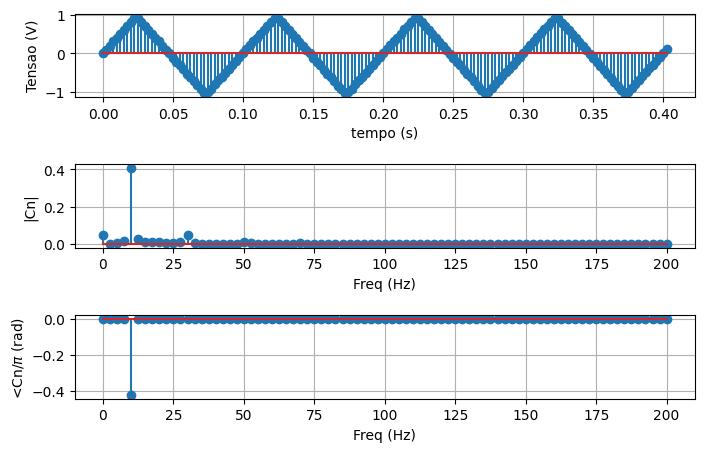


b-) Compare com o resultado analítico da Seção 2.1

**Resposta:** Na onda triangular, comparativamente com os outros tipos de onda, apresenta uma queda ainda mais abrupta, podendo ser visualizado apenas seu primeiro componente harmônico e sua respectiva fase. No entanto, é fácilmente perceptível a importância do componente da frequência fundamental na reconstrução do sinal da onda triangular.

In [2]:
# Essa celula foi concebida 
# somente teste de geracao de arquivo
# Na pratica nao utilizar
# Script FFT para Onda Senoidal
%matplotlib qt
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
#from scipy import signal
SampRate = 400.0                   # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao = 2.0                     # Duracao da amostragem
N = int(Duracao/T)+1               # Numero de pontos amostrados
t = np.linspace(0.0,Duracao,N)  # array de tempo
print('t = ',t)
# Parametros da onda senoidal
A = 2.0                  # Amplitude
fsignal = 10.0            # Frequencia do sinal senoidal Hz
Phi = 0.0                # Angulo de fase em radianos
K = 0.0                  # Constante
# Simulacao da amostragem da onda senoidal
x = K + A * np.sin(2*np.pi*fsignal*t + Phi)
with open('', 'w') as fp:
    for valor in x:
        fp.write(str(round(valor,2))+'\n')
fp.close()

t =  [0.     0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225
 0.025  0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475
 0.05   0.0525 0.055  0.0575 0.06   0.0625 0.065  0.0675 0.07   0.0725
 0.075  0.0775 0.08   0.0825 0.085  0.0875 0.09   0.0925 0.095  0.0975
 0.1    0.1025 0.105  0.1075 0.11   0.1125 0.115  0.1175 0.12   0.1225
 0.125  0.1275 0.13   0.1325 0.135  0.1375 0.14   0.1425 0.145  0.1475
 0.15   0.1525 0.155  0.1575 0.16   0.1625 0.165  0.1675 0.17   0.1725
 0.175  0.1775 0.18   0.1825 0.185  0.1875 0.19   0.1925 0.195  0.1975
 0.2    0.2025 0.205  0.2075 0.21   0.2125 0.215  0.2175 0.22   0.2225
 0.225  0.2275 0.23   0.2325 0.235  0.2375 0.24   0.2425 0.245  0.2475
 0.25   0.2525 0.255  0.2575 0.26   0.2625 0.265  0.2675 0.27   0.2725
 0.275  0.2775 0.28   0.2825 0.285  0.2875 0.29   0.2925 0.295  0.2975
 0.3    0.3025 0.305  0.3075 0.31   0.3125 0.315  0.3175 0.32   0.3225
 0.325  0.3275 0.33   0.3325 0.335  0.3375 0.34   0.3425 0.345  0.3475
 

FileNotFoundError: [Errno 2] No such file or directory: ''

<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Edilson Elias\AppData\Local\Temp\ipykernel_35760\2213078463.py:73: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('<Cn/$\pi$ (rad)')


N =  162


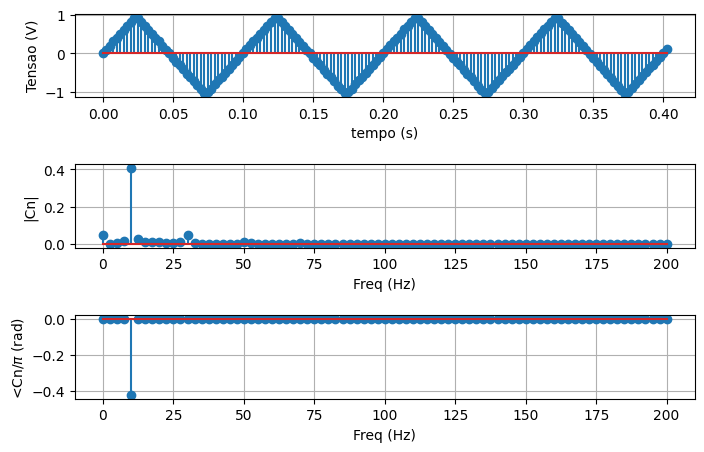

In [5]:
# Para ser utilizado nos itens 2.2.1, 2.2.2, 2.2.3
# Script para calculo FFT
# Onda Senoidal, Quadrada, Triangular
#
#%matplotlib qt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
#from scipy import signal
SampRate = 400.0                   # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
# leitura do arquivo de dados
# Coloque aqui o nome do seu arquivo de dados
nomedoarquivo = "2.2.3.txt"
x=[]
with open(nomedoarquivo) as fr:
    for number in fr:
        x.append(float(number))
# calculando o vetor de tempo novamente
N=len(x);   # Numero de pontos
print('N = ',N);
Duracao = (N-1)*T;
t=np.linspace(0.0,Duracao,N);
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.05               # parametro de tolerancia
                         # filtro de componentes pequenas
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2])
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
#plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.stem(fm,AngleCn[0:N//2]/np.pi)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()

## 3. Teorema da amostragem

### 3.1 Estimar o espectro de uma onda senoidal $x(t)$ utilizando o algoritmo FFT com diferentes taxas de amostragem $f_s$
   
- **Os resultados dessa seção serão gerados amostrando-se 
  por simulação a onda senoidal $x(t) = 2.0 \sin(2\pi 40t)$.**
- Utilizar o script da célula abaixo.

a-) Utilizar $f_s=400$ amostras/s

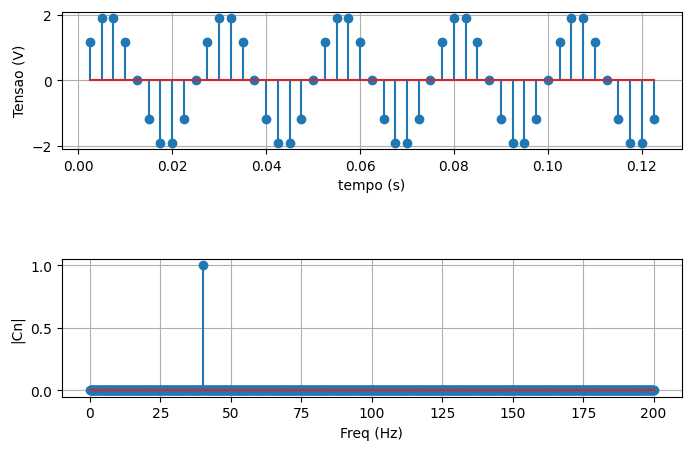

b-) Utilizar $f_s=81$ amostras/s

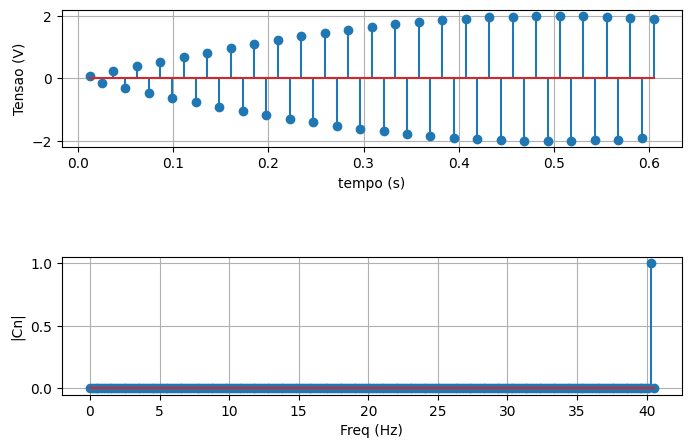

c-) Utilizar $f_s=80$ amostras/s

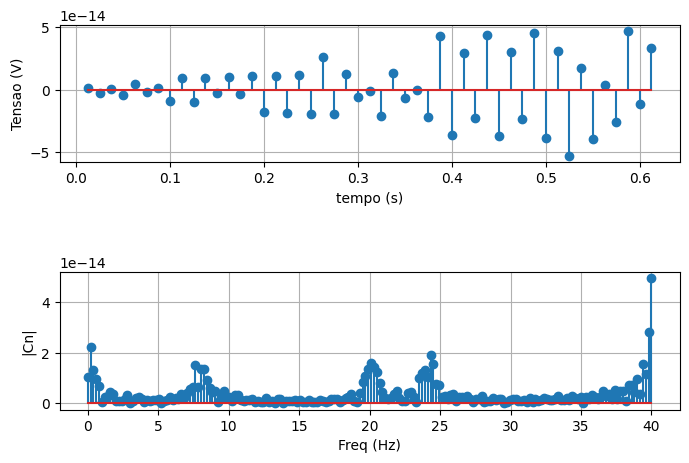

d-) Utilizar $f_s=60$ amostras/s

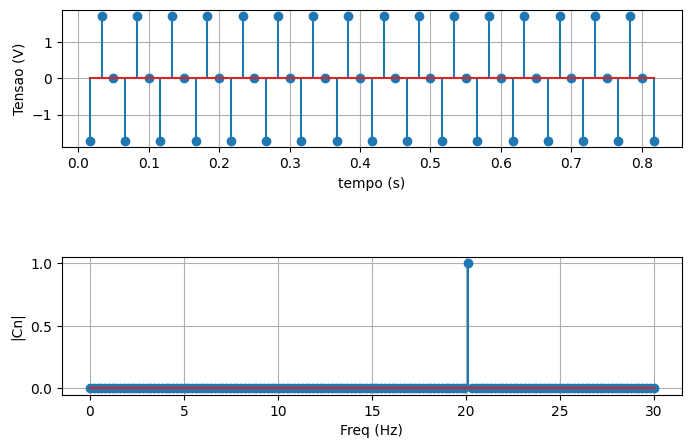

2-) Preencha a tabela abaixo com os valores obtidos das frequências que foram
    observadas no gráfico do Espectro:

| taxa de amostragem $f_s$ (Hz) |freq. observada no gráfico do Espectro (Hz) |
| :-: | :-: |
|400|40.042|
|81|40.299|
|80| $\approx$ 0|
|60|20.134|

3-) Faça uma análise dos resultados obtidos utilizando o Teorema da Amostragem de Nyquist:

**Resposta:** É possível perceber que para valores superiores à frequência de Nyquist (> 2 $f_a$ ) a componente do sinal reconstruído pôde ser estimada com uma boa precisão da componente do sinal. No entanto, para a frequência de amostragem igual a frequência de Nyquist, como as frequências são as mesmas, coincide que sempre em regiões próximas às raízes do sinal é realizado a amostragem, fazendo com que seja entendido como um sinal nulo e, consequentemente, com frequência nula. Já para a frequência de 60 Hz, que é abaixo da frequência de Nyquist do sinal, o aliasing faz com que seja percebido uma frequência $ |f-f_a| $, logo, como a frequência f é de 40 Hz e a frequência de amostragem é 60 Hz, a FFT capta um sinal com uma frequência observada no espectro de 20 Hz.

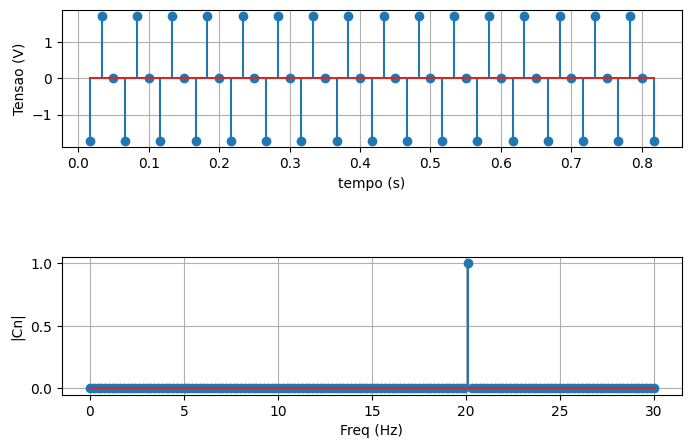

In [6]:
# Script para ser utilizado na secao 3
# Script FFT para Onda Senoidal
# Geracao da onda senoidal por simulacao
#%matplotlib qt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
#from scipy import signal
SampRate = 60               # Taxa de amostragem
T = 1/SampRate                    # Intervalo de amostragem
Duracao = 5                       # Duracao da amostragem
N = int(Duracao/T)                # Numero de pontos amostrados
t = np.linspace(0.0,Duracao-T,N)  # array de tempo
# Parametros da onda senoidal
A =  2.0                # Amplitude
fsignal =  40           # Frequencia do sinal senoidal Hz
Phi = 0                 # Angulo de fase em radianos
K = 0                   # Constante
# Simulacao da amostragem da onda senoidal
x = K + A * np.sin(2*np.pi*fsignal*t + Phi)
#
# Calculo do Espectro
#
Cn = fft(x)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#Calcule o espectro do sinal reconstruído $x_r$
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(211)
fim = 50
plt.stem(t[1:fim],x[1:fim])
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(212)
plt.stem(fm, modCn[0:N//2])
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()

## 4. Algoritmos de reconstrução de sinais

Nessa seção serão analisados o desempenho dos algoritmos de reconstrução de sinais: Reconstrutor de Ordem Zero, Interpolador Linear e Reconstrutor de Shannon.

Os resultados serão obtidos através da simulação da amostragem de um sinal senoidal.

As células abaixo devem ser executadas de forma sequencial.

### Simulação da amostragem de um sinal senoidal

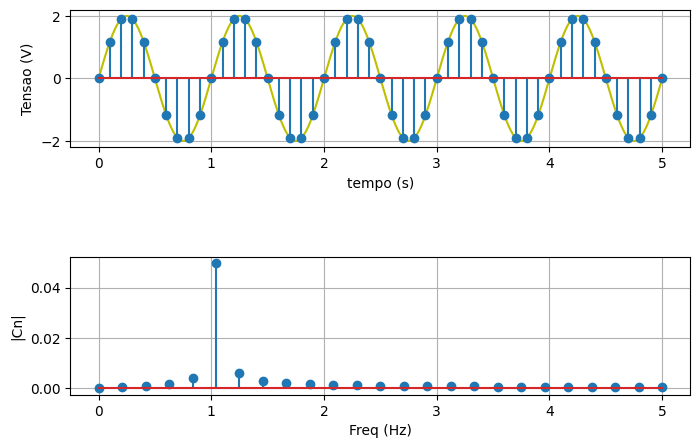

In [7]:
# Script FFT para Onda Senoidal
#%matplotlib qt           
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
#from scipy import signal
# Parametros de amostragem
SampRate = 10.0                     # Taxa de amostragem
Ts = 1/SampRate                     # Intervalo de amostragem
Duracao = 5                         # Duracao da amostragem em segundos
Ns = int(Duracao/Ts) + 1            # Numero de pontos amostrados
ts = np.linspace(0.0,Duracao,Ns)    # array de tempo correspondente aos pontos amostrados
# Parametros da onda senoidal
A = 2.0                 # Amplitude
fsignal = 1.0           # Frequencia do sinal senoidal Hz
Phi = 0.0 ;             # Angulo de fase em radianos
Offset = 0.0            # Offset DC
# Amostragem da onda senoidal utilizando SampRate
# (xs,ts)
xs = Offset + A * np.sin(2*np.pi*fsignal*ts + Phi)
# Simulacao da onda senoidal de tempo continuo
# Utilizacao de amostragem 20 vezes mais rapida
# (x,t)
F = 20*SampRate
T = 1/F
N = int(Duracao/T)+1
t = np.linspace(0.0,Duracao,N)
x = Offset + A * np.sin(2*np.pi*fsignal*t + Phi)
#
# Calculo do Espectro
#
Cn = fft(xs)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*Ts), Ns//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
# plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(211)
plt.plot(t,x,'y')                          # simulacao da onda senoidal tempo continuo - amarelo
plt.stem(ts,xs)                            # pontos amostrados barras verticais com circulos - azul
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(212)
plt.stem(fm, modCn[0:Ns//2]) # Espectro - grafico do modulo
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()

## 4.1 Reconstrutor de Ordem Zero

O reconstrutor de ordem zero é o algoritmo de reconstrução mais utilizado em sistemas de controle digital devido a simplicidade de sua implementação física através de circuitos eletrônicos e a sua não dependência de dados de instantes anteriores e posteriores o que permite sua utilização em tempo real.
Muito embora o processo de reconstrução não seja muito preciso ele é bastante utilizado em aplicações que não requerem precisão muito elevada como em sistemas de controle.
A figura a seguir ilustra a amostragem de um sinal e posterior reconstrução de ordem zero. 

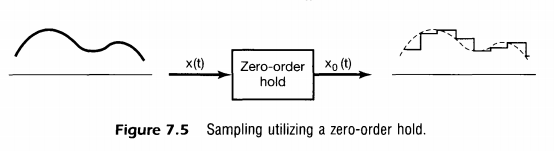

O algoritmo pode ser definido como:
\begin{equation}
x_0 \left(t\right)=x_s(nT), \;\; nT \le t<(n+1)T
\end{equation}
onde $x_s(nT), \;\; n=0,1,2,\ldots$ são as amostras do sinal.

a-) Reconstrução do sinal amostrado através do Reconstrutor de Ordem Zero. Executar a célula abaixo.

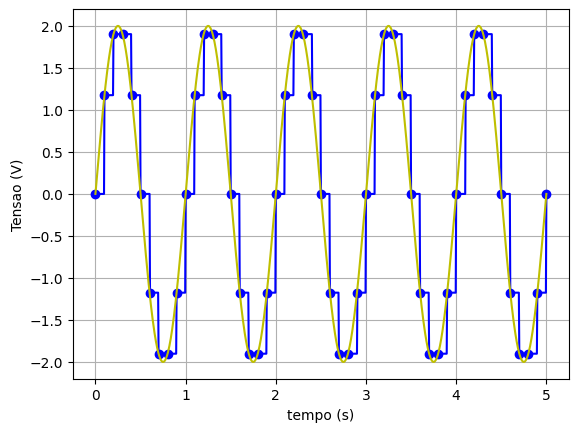

In [8]:
# Funcao que calcula o valor da onda senoidal reconstruida considerando considerando o reconstrutor de Ordem Zero
# no dominio do tempo continuo representado pelo array t
def funcZOH(xs,t,Ts,Ns):
  z =0.0
  index = math.floor(t/Ts)
  if index < Ns-1:
    z = xs[index]
  return(z)
# Script para estimacao da onda reconstruida para o dominio do tempo continuoo t 
xr = np.zeros(N)
for k in range(N):
  xr[k] = funcZOH(xs,t[k],Ts,Ns)
plt.plot(ts,xs,'bo')       # pontos amostrados - circulos azuis
plt.plot(t,xr,'b')         # onda senoidal reconsruida a partir dos pontos amostrados e reconstrutor de
                           # Ordem Zero
plt.plot(t,x,'y')          # simulacao da onda senoidal de tempo continuo - amarelo
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()

b-) Erro de aproximação

O erro de aproximação do reconstrutor pode ser calculado como:
\begin{equation}
\text{erro} = x-x_r.
\end{equation}

Executar a célula abaixo.

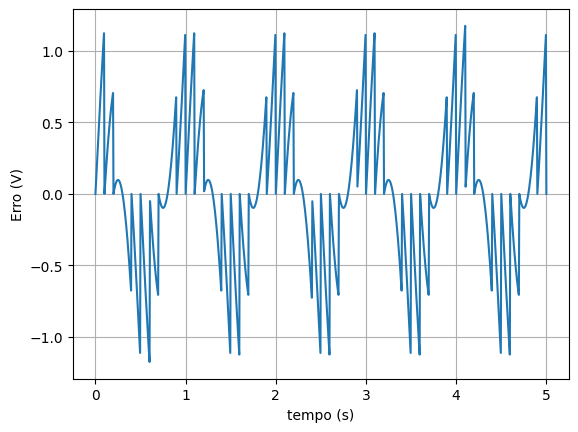

In [9]:
# Erro de aproximacao do reconstrutor de Ordem Zero
erro = x - xr
plt.plot(t,erro)
plt.xlabel('tempo (s)')
plt.ylabel('Erro (V)')
plt.grid()

c-) Calcule o espectro do sinal reconstruído $x_r$
(Obs: utilize a céula abaixo para inserir o seu código).

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Edilson Elias\AppData\Local\Temp\ipykernel_35760\2766337160.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('<Cn/$\pi$ (rad)')


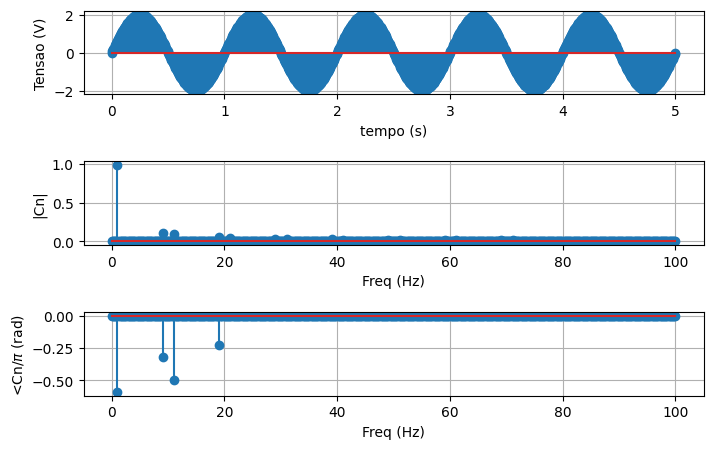

In [10]:
# Calculo do Espectro
#
Cn = fft(xr)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.05               # parametro de tolerancia
                         # filtro de componentes pequenas
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2])
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
#plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.stem(fm,AngleCn[0:N//2]/np.pi)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()

d-) Analise os resultados obtidos

**Resposta:** Como é obtido teoricamente, o sinal obtido pelo reconstrutor de ordem zero apresenta um atraso em relação ao sinal original, mostrado no gráfico de fase da transformada FFT do sinal amostrado. Além de um erro consideravelmente maior.

### 4.2 Interpolador Linear

O algoritmo de interpolação linear une os pontos através de segmentos de retas.

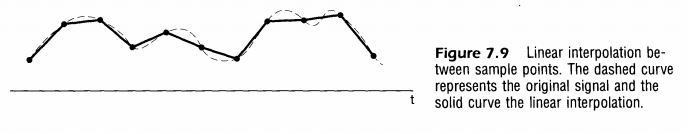

O algoritmo pode ser definido como:
\begin{equation}
x_r (t)=x_p (nT)+\frac{1}{T} \left\lbrack x_s((n+1)T)-x_s(nT) \right\rbrack , \;\; nT \le t < (n+1)T
\end{equation}
onde $x_s(nT), \;\; n=0,1,2,\ldots$ são as amostras do sinal.

Sua utilização em tempo real só pode ser feita se houver um delay de um intervalo de amostragem já que é necessário conhecer a amostra $x_s((n+1)T)$ antecipadamente.

a-) Reconstrução do sinal amostrado através do Interpolador Linear. Executar a célula abaixo.

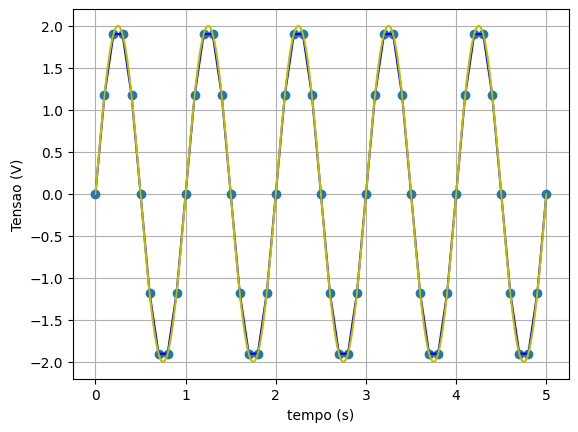

In [11]:
# Interpolador Linear
def funcFOH(xs,ti,ts,Ts,Ns):
  z = 0.0
  index = math.floor(ti/Ts)
  #print("index=",index)
  #print('Ns = ',Ns)
  if index < Ns - 1:
    alfa = ( xs[index+1] - xs[index] ) / ( ts[index+1] - ts[index] )
    z = xs[index] + alfa * ( ti - ts[index] )
  else:
    z = xs[Ns-1]
  return(z)
xrf = np.zeros(N)
for k in range(N):
  xrf[k] = funcFOH(xs,t[k],ts,Ts,Ns)
  #if k == 40:
  #  breakfloor
plt.figure(2)
plt.plot(ts,xs,'o')
plt.plot(t,xrf,'b')
plt.plot(t,x,'y')
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()

b-) Erro de aproximação

O erro de aproximação do reconstrutor pode ser calculado como:
\begin{equation}
\text{erro} = x-x_r.
\end{equation}

Executar a célula abaixo.

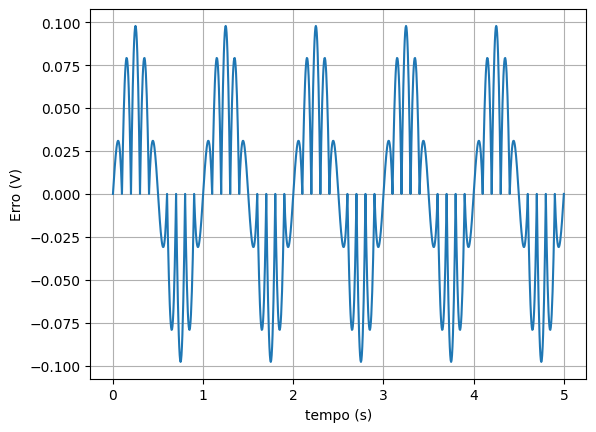

In [12]:
# Erro do Interpolacao Linear
erro = x - xrf
plt.plot(t,erro)
plt.xlabel('tempo (s)')
plt.ylabel('Erro (V)')
plt.grid()

c-) Calcule o espectro do sinal reconstruído $x_r$
(Obs: utilize a céula abaixo para inserir o seu código).

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Edilson Elias\AppData\Local\Temp\ipykernel_35760\3265955223.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('<Cn/$\pi$ (rad)')


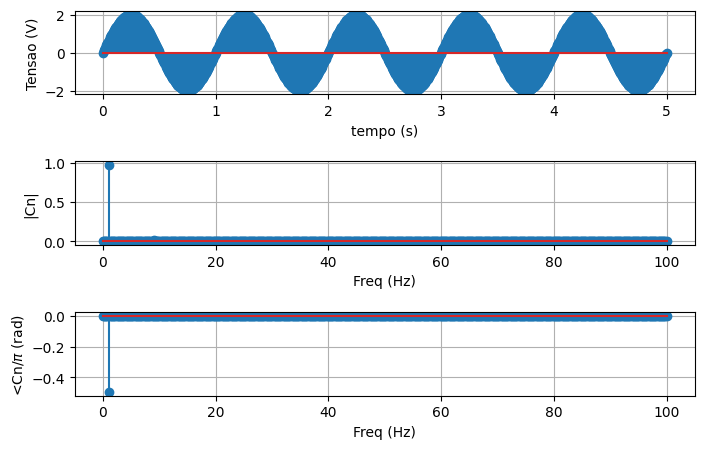

In [13]:
# Calculo do Espectro
#
Cn = fft(xrf)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.05               # parametro de tolerancia
                         # filtro de componentes pequenas
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2])
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
#plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.stem(fm,AngleCn[0:N//2]/np.pi)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()

d-) Analise os resultados obtidos

**Resposta:** O interpolador linear reduz consideravelmente o erro ao ser comparado com o reconstrutor de ordem 0. Além disso, sua transformada FFT se aproxima muito bem com a transformada do sinal, captando a sua frequência principal e o seu atraso.

## 4.3 Reconstrutor de Shannon

O reconstrutor de Shannon é um filtro interpolador ideal. Sua definição utiliza uma somatória de funções sinc() considerando todos os pontos amostrados.

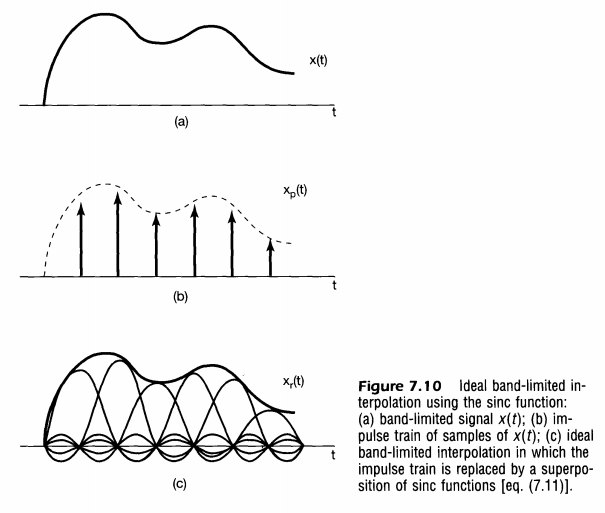

\begin{equation}
x_r(t) = \sum_{-\infty}^{+\infty} x_s(nT) \frac{\omega_c T}{\pi} \frac{\sin (\omega_c(t-nT))}{\omega_c(t-nT)}
\end{equation}
onde \begin{equation} \omega_c=\frac{\omega_s}{2} \end{equation}

**A utilização todos os pontos no intervalo  torna o filtro NÃO CAUSAL e portanto de implementação prática inviável**.
Simplificações do algoritmo com poucos pontos pode ser realizada em aplicações que não exijam requisitos de tempo real.

Por exemplo, para $N_s$ pontos amostrados podemos escrever:
\begin{equation}
x_r(t) = \sum_{0}^{N_s-1} x_s(nT) \frac{\omega_c T}{\pi} \frac{\sin (\omega_c(t-nT))}{\omega_c(t-nT)}
\end{equation}

Essa equação pode ser ainda escrita de uma forma mais simples:
\begin{equation}
x_r(t) = \sum_{0}^{N_s-1} x_s(nT) \operatorname{sinc}\left(\frac{t-nT}{T}\right)
\end{equation}
onde 
\begin{equation}
\operatorname{sinc}(x)=\frac{\sin (\pi x)}{\pi x}
\end{equation}

a-) Reconstrução do sinal amostrado através do Reconstrutor de Shannon. Executar a célula abaixo.

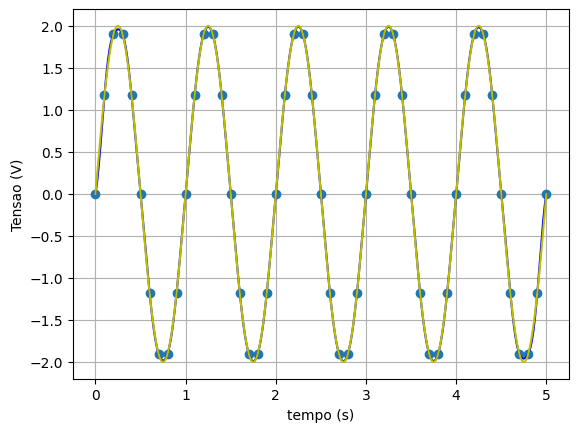

In [14]:
def ShannonReconstructor(xs,ti,ts,Ts,Ns):
    soma=0.0;
    for n in range(Ns):
      soma = soma + xs[n] * np.sinc((ti-n*Ts)/Ts);
    return(soma)
xrs = np.zeros(N)
for k in range(N):
  xrs[k] = ShannonReconstructor(xs,t[k],ts,Ts,Ns)
plt.figure(2)
plt.plot(ts,xs,'o')
plt.plot(t,xrs,'b')
plt.plot(t,x,'y')
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()

b-) Erro de aproximação

O erro de aproximação do reconstrutor pode ser calculado como:
\begin{equation}
\text{erro} = x-x_r.
\end{equation}

Executar a célula abaixo.

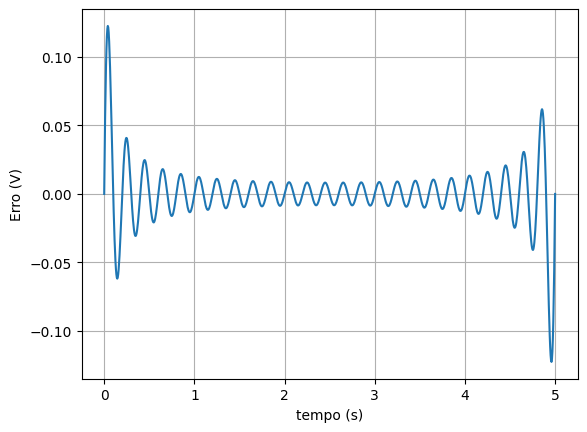

In [15]:
erro = x - xrs
plt.plot(t,erro)
plt.xlabel('tempo (s)')
plt.ylabel('Erro (V)')
plt.grid()

c-) Calcule o espectro do sinal reconstruído $x_r$
(Obs: utilize a céula abaixo para inserir o seu código).

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Edilson Elias\AppData\Local\Temp\ipykernel_35760\195099342.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('<Cn/$\pi$ (rad)')


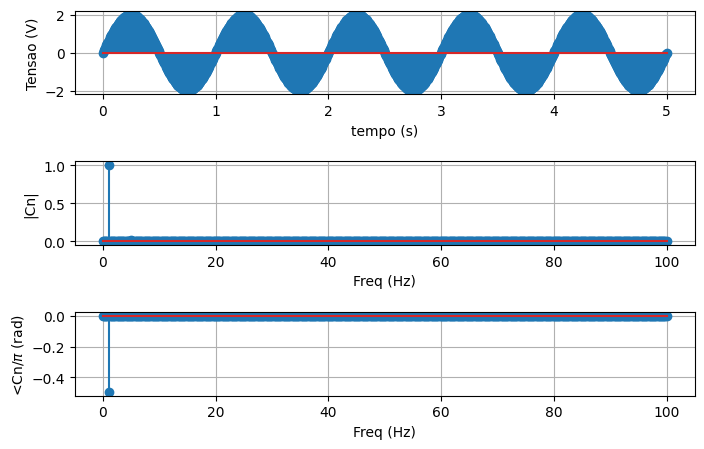

In [16]:
# Calculo do Espectro
#
Cn = fft(xrs)/N;           # Transformada de Fourier Discreta
# print(Cn)
# Modulo
modCn = np.abs(Cn);
# Fase
tol = 0.05               # parametro de tolerancia
                         # filtro de componentes pequenas
AngleCn = np.angle(Cn);
# Elimina-se as componentes insignificantes
# ou seja, componentes cujo modulo é
# muito pequeno
for k in range (0,N):
  if modCn[k] < tol:
     AngleCn[k]=0.0
#
# Escala de frequencias para o
# grafico do espectro do sinal
# Note que a  escala vai de 0 ate a metade
# da taxa de amostragem.
# A outra metade e' sempre simetrica a primeira.
# Verifique o arquivo TutorialFFT.html
fm = np.linspace(0.0, 1.0/(2.0*T), N//2)
#
# Utilizacao de subplots
# Utiliza-se graficos do tipo "stem"
# mais adequados para o espectro
#plt.figure(1)
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=0.8)
plt.subplot(311)
plt.stem(t,x)
plt.xlabel('tempo (s)')
plt.ylabel('Tensao (V)')
plt.grid()
plt.subplot(312)
plt.stem(fm, modCn[0:N//2])
plt.xlabel('Freq (Hz)')
plt.ylabel('|Cn|')
plt.grid()
plt.subplot(313)
# A Fase é dividida por pi
# Dessa forma a escala se refere a multiplos do angulo pi
#plt.stem(fm,AngleCn[0:N//2]/np.pi,use_line_collection=True)
plt.stem(fm,AngleCn[0:N//2]/np.pi)
plt.xlabel('Freq (Hz)')
plt.ylabel('<Cn/$\pi$ (rad)')
plt.grid()
plt.show()

d-) Analise os resultados obtidos. Por que o gráfico de erros não é uniforme ?

**Resposta:** O Reconstrutor de Shannon é o que mais se aproxima do resultado ideal do sinal. No entanto, apresenta um erro considerável nos extremos do sinal, isso acontece devido a ausência de pontos anteriores e posteriores ao sinal, pois o reconstrutor de Shannon necessita desses sinais para ser o reconstrutor ideal, o que é impossível, pois o deixaria como não causal.

## 5. Discussões

Foi verificado experimentalmente o funcionamento de um sistema de aquisição de dados com conversores A/D e D/A, possibilitando a análise prática da influência da frequência de amostragem no processo de aquisição e reconstrução de sinais. A partir desses experimentos e de simulações, constatou-se a importância de utilizar uma taxa de amostragem adequada para aplicações em plantas reais.

Os resultados práticos e teóricos confirmaram o Teorema da Amostragem de Nyquist, segundo o qual, para que um sinal possa ser reconstruído sem perda de informação, a frequência de amostragem deve ser maior que o dobro da maior frequência presente no sinal de interesse.

Além disso, a análise dos erros de reconstrução mostrou que métodos mais sofisticados, como o Reconstrutor de Shannon (interpolação ideal por sinc) e o Reconstrutor Linear (interpolação por segmentos de reta), apresentam menor erro médio quando comparados ao Reconstrutor de Ordem Zero (retenção de nível). Apesar de simples e rápido, este último introduz distorções significativas na forma de onda, prejudicando a fidelidade do sinal reconstruído.

## 6. Conclusões

A análise dos sistemas de aquisição e reconstrução a partir de sinais amostrados possibilitou uma compreensão mais profunda sobre a influência e os erros introduzidos por cada tipo de reconstrutor e pelos elementos do sistema. Além disso, foi introduzido o uso da FFT (Fast Fourier Transform — Transformada Rápida de Fourier), um algoritmo de grande relevância para a ciência e essencial para a formação de um engenheiro, por permitir a análise espectral eficiente de sinais digitais.

Por fim, conclui-se que o estudo da influência da amostragem e o domínio de algoritmos computacionais como a FFT contribuem significativamente para a compreensão do comportamento de sistemas digitais, sendo fundamentais para o futuro projeto e controle de sistemas de malha fechada em ambiente digital.